In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. Chose relevant columns
2. get dummy data
3. train test split
4. multiple linear regression
5. Lasso regression
6. random Forest
7. Tune model GridSearchCV
8. Test Ensembles

In [2]:
df=pd.read_csv('Salary_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,job_simplified,seniority,desc_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,47,1,0,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,36,1,0,0,0,0,data scientist,na,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,10,1,0,1,0,1,data scientist,na,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,55,1,0,0,0,0,data scientist,na,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,22,1,0,0,0,1,data scientist,na,2728


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company text', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simplified', 'seniority',
       'desc_len'],
      dtype='object')

In [5]:
df_model=df[['Rating','Size','Type of ownership','Industry','Sector','Revenue','Competitors','hourly','employer_provided',
          'job_state','same_state','age','python_yn','spark_yn','aws_yn','excel_yn','job_simplified','seniority','desc_len',
          'avg_salary']]

In [6]:
df_model

,Rating,Size,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,job_state,same_state,age,python_yn,spark_yn,aws_yn,excel_yn,job_simplified,seniority,desc_len,avg_salary
0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,47,1,0,0,1,data scientist,na,2536,72.0
1,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,36,1,0,0,0,data scientist,na,4783,87.5
2,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,10,1,1,0,1,data scientist,na,3461,85.0
3,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,55,1,0,0,0,data scientist,na,3883,76.5
4,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,22,1,0,0,1,data scientist,na,2728,114.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),3,0,0,MA,0,190,0,0,1,0,na,senior,6162,84.5
738,4.4,1001 to 5000 employees,Company - Public,Internet,Information Technology,$100 to $500 million (USD),3,0,0,TN,0,14,1,1,1,0,data engineer,senior,6130,102.5
739,2.6,501 to 1000 employees,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,0,0,PA,1,36,0,0,0,1,na,na,3078,73.5
740,3.2,1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,0,0,PA,0,-1,0,0,0,1,manager,na,1642,127.5


In [7]:
dummies=pd.get_dummies(df_model)

In [8]:
dummies

,Rating,Competitors,hourly,employer_provided,same_state,age,python_yn,spark_yn,aws_yn,excel_yn,...,job_simplified_analyst,job_simplified_data engineer,job_simplified_data scientist,job_simplified_director,job_simplified_manager,job_simplified_mle,job_simplified_na,seniority_jr,seniority_na,seniority_senior
0,3.8,0,0,0,0,47,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,3.4,0,0,0,0,36,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4.8,0,0,0,1,10,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,3.8,3,0,0,1,55,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2.9,3,0,0,1,22,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,3,0,0,0,190,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
738,4.4,3,0,0,0,14,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1
739,2.6,0,0,0,1,36,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
740,3.2,0,0,0,0,-1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=dummies.drop('avg_salary',axis=1)
y=dummies['avg_salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#test_size 0.2 means 20% data in test set

### Multiple linear Regression

In [11]:
import statsmodels.api as sm

In [12]:
X_sm=X=sm.add_constant(X)
model=sm.OLS(y,X_sm)
model.fit().summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001885E6F5A90>>

In [13]:
from sklearn.linear_model import LinearRegression,Lasso

In [14]:
lm=LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-20.7668551289259

### Lasso Regression

In [18]:
lm_l=Lasso()

In [19]:
lm_l.fit(X_train,y_train)

Lasso()

In [20]:
np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-21.0941474114959

In [21]:
alpha=[]
error=[]

In [22]:
for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
    

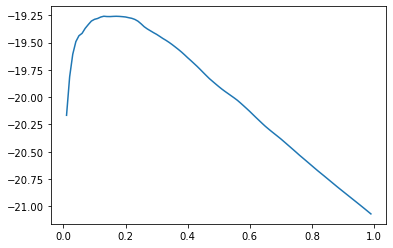

In [23]:
plt.plot(alpha,error)

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf=RandomForestRegressor()

In [26]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-14.969291989266608

### Test Ensembles

In [28]:
tpred_lm=lm.predict(X_test)

In [29]:
tpred_lml=lm_l.predict(X_test)#for lasso regression

In [30]:
tpred_rf=rf.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
mean_absolute_error(y_test,tpred_lm)

18.855189990211993

In [33]:
mean_absolute_error(y_test,tpred_lml)

23.332976801412073

In [34]:
mean_absolute_error(y_test,tpred_rf)

11.04724832214765

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameters={'n_estimators':[200],'criterion':('mse','mae'),'max_features':('auto','sqrt','log2'),}

In [37]:
gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3,verbose=2)

In [38]:
gs.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] criterion=mse, max_features=auto, n_estimators=200 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_features=auto, n_estimators=200, total=   1.0s
[CV] criterion=mse, max_features=auto, n_estimators=200 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  criterion=mse, max_features=auto, n_estimators=200, total=   1.1s
[CV] criterion=mse, max_features=auto, n_estimators=200 ..............
[CV]  criterion=mse, max_features=auto, n_estimators=200, total=   1.2s
[CV] criterion=mse, max_features=sqrt, n_estimators=200 ..............
[CV]  criterion=mse, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] criterion=mse, max_features=sqrt, n_estimators=200 ..............
[CV]  criterion=mse, max_features=sqrt, n_estimators=200, total=   0.6s
[CV] criterion=mse, max_features=sqrt, n_estimators=200 ..............
[CV]  criterion=mse, max_features=sqrt, n_estimators=200, total=   0.5s
[CV] criterion=mse, max_features=log2, n_estimators=200 ..............
[CV]  criterion=mse, max_features=log2, n_estimators=200, total=   0.4s
[CV] criterion=mse, max_features=log2, n_estimators=200 ..............
[CV]  criterion=mse, max_features=log2, n_estimators=200, total=   0.4s
[CV] criterion=mse, max_features=log2, n_estimators=200 ..............

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   52.5s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': [200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [39]:
gs.best_score_

-14.983030313712419

In [40]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=200)

In [41]:
tpred_rf1=gs.best_estimator_.predict(X_test)

In [42]:
mean_absolute_error(y_test,tpred_rf1)

11.104899328859059

## Putting the model into Production

In [43]:
import pickle

In [44]:
pickl={'model':gs.best_estimator_}

In [45]:
pickle.dump(pickl,open('model_file'+'.p','wb'))

In [46]:
file_name='model_file.p'

In [47]:
with open(file_name,'rb') as pickled:
    data=pickle.load(pickled)
    model=data['model']

In [48]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

array([51.035])

In [49]:
list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 34.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [50]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

array([51.035])

In [51]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,tpred_lm))

ValueError: continuous is not supported

In [ ]:
y_test